Do `Kernel -> Restart & Run All` in top menu to run the notebook

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, freqz, resample, convolve
import soundfile as sf
import IPython

## Speech + noise

In [3]:
# read the speech
data, fs = sf.read('data/050a0508_1.4465_22gc0102_-1.4465.wav')
# create white noise
noise_all = np.random.randn(data.shape[0])
# filter the noise to have it around 800 Hz
b, a = butter(5, [0.2, 0.25], 'bandpass')
noise_narrow  = lfilter(b, a, noise_all)
# add noise to the speech
data_noise = data + noise_narrow

In [4]:
# create bandstop filter to filter out frequencies corrupted by the noise
b, a = butter(5, [0.15, 0.3], 'bandstop')
data_filt = lfilter(b, a, data_noise)

In [5]:
print('Clean speech')
IPython.display.display(IPython.display.Audio(data, rate=fs))
print('Corrupted speech')
IPython.display.display(IPython.display.Audio(data_noise, rate=fs))
print('Filtered speech')
IPython.display.display(IPython.display.Audio(data_filt, rate=fs))

Clean speech


Corrupted speech


Filtered speech


<IPython.core.display.Javascript object>


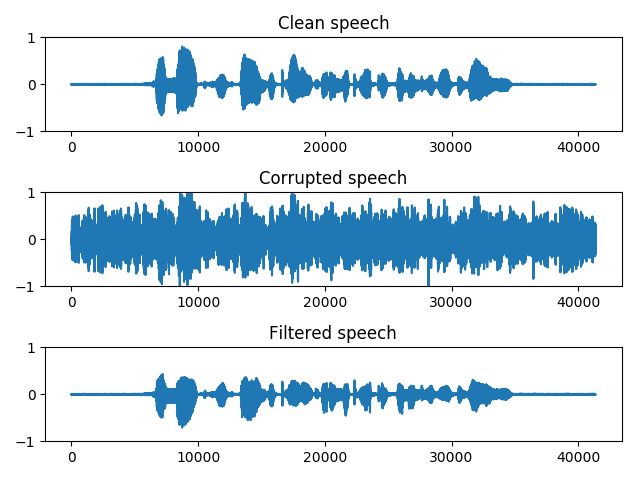

In [6]:
fig, ax = plt.subplots(3,1)
for a in ax:
    a.set_ylim([-1, 1])
ax[0].plot(data)
ax[0].set_title('Clean speech')
ax[1].plot(data_noise)
ax[1].set_title('Corrupted speech')
ax[2].plot(data_filt)
ax[2].set_title('Filtered speech')
fig.tight_layout()
plt.show()

## Speech + room reverb

In [7]:
# read the impulse response of the tunnel
rir, _ = sf.read('data/middle_tunnel_1way_mono.wav')
rir = resample(rir, rir.shape[0]//12)

In [8]:
# convolve speech with IR
data_reverb = convolve(data, rir)

<IPython.core.display.Javascript object>


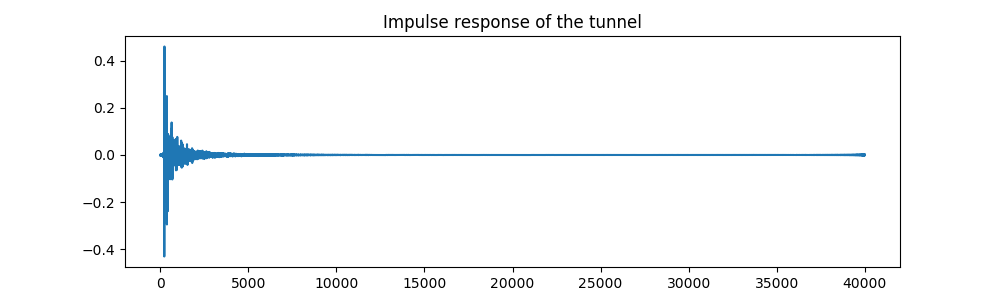

In [9]:
plt.figure(figsize=(10,3))
plt.plot(rir)
plt.gca().set_title('Impulse response of the tunnel')
plt.show()

In [10]:
print('Clean speech')
IPython.display.display(IPython.display.Audio(data, rate=8000))
print('Impulse response')
IPython.display.display(IPython.display.Audio(rir, rate=8000))
print('Reverberated speech')
IPython.display.display(IPython.display.Audio(data_reverb, rate=8000))

Clean speech


Impulse response


Reverberated speech


## Global temperature

Source of the signal with some more info https://datahub.io/core/global-temp

In [11]:
# load the data
with open('data/monthly_csv.csv','r') as f:
    temps = np.array([float(line.split(',')[2]) for line in f if line.startswith('GISTEMP')])
temps = np.flip(temps, 0)

In [12]:
# create a low-pass filter
b, a = butter(5, [0.02])
temps_filt = lfilter(b, a, temps)

<IPython.core.display.Javascript object>


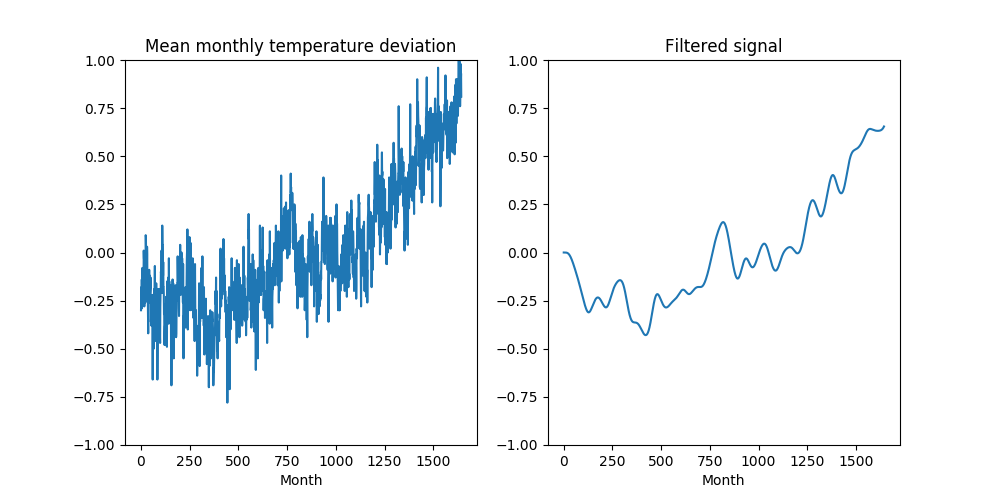

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].set_ylim([-1, 1])
ax[1].set_ylim([-1, 1])
ax[0].plot(temps)
ax[1].plot(temps_filt)
ax[0].set_title('Mean monthly temperature deviation')
ax[0].set_xlabel('Month')
ax[1].set_title('Filtered signal')
ax[1].set_xlabel('Month')
plt.show()